# Social Media Project

## Business Objective
 * An aviation company that provides domestic as well as international trips to the customers now wants to apply a targeted approach instead of reaching out to each of the customers. This time they want to do it digitally instead of tele calling. Hence they have collaborated with a social networking platform, so they can learn the digital and social behaviour of the customers and provide the digital advertisement on the user page of the targeted customers who have a high propensity to take up the product. Propensity of buying tickets is different for different login devices. Hence, you have to create 2 models separately for Laptop and Mobile. *[Anything which is not a laptop can be considered as mobile phone usage.]*.The advertisements on the digital platform are a bit expensive; hence, you need to be very accurate while creating the models.

### - Here we'll build a model combined for both `Mobile` and `Laptop`.

## Data Description
1. **UserID** : Unique ID of user
                        
                        
2. **Buy_ticket** : Buy ticket in next month


3. **Yearly_avg_view_on_travel_page** : Average yearly views on any travel related page by user


4. **preferred_device** : Through which device user preferred to do login


5. **total_likes_on_outstation_checkin_given** : Total number of likes given by a user on out of station checkings in        last year


6. **yearly_avg_Outstation_checkins** : Average number of out of station check-in done by user


7. **member_in_family** : Total number of relationship mentioned by user in the account


8. **preferred_location_type** : Preferred type of the location for travelling of user


9. **Yearly_avg_comment_on_travel_page** : Average yearly comments on any travel related page by user


10. **total_likes_on_outofstation_checkin_received** : Total number of likes received by a user on out of station checkings  in last year


11. **week_since_last_outstation_checkin** : Number of weeks since last out of station check-in update by user


12. **following_company_page** : Weather the customer is following company page (Yes or No)


13. **montly_avg_comment_on_company_page** : Average monthly comments on company page by user


14. **working_flag** : Weather the customer is working or not


15. **travelling_network_rating** : Does user have close friends who also like travelling. 1 is highs and 4 is lowest


16. **Adult_flag** : Whether the customer is adult or not


17. **Daily_Avg_mins_spend_on_traveling_page** : Average time spend on the company page by user on daily basis

## Importing required libraries

In [1]:
##basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##plotting and graph
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.offline as pyo
from plotly.subplots import make_subplots
from matplotlib import gridspec

##feature engineering and splitting
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

##machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

from colorama import Fore, Back, Style 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('social_media.csv')
data.head()

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                2               Financial                               94.0   
1                1               Financial                               61.0   
2                2                   Other                               92.0   
3                4               Financial                               56.0   
4                1                 Medical                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   

   montly_avg_comment_on_company_page working_flag  travelling_network_rating  \
0                                  11           No                          1   
1                                  23          Yes                          4   
2                                  15           No                          2   
3                                  11           No                          3   
4                                  12           No                          4   

   Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
0           0                                       8  
1           1                                      10  
2           0                                       7  
3           0                                       8  
4           1                                       6

In [3]:
df = data.copy()

In [4]:
##automated eda -1
from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11760  │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 7     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %            ┃ mean    ┃ sd    ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ UserID          │   0 │               0 │ 1000000 │  3400 │ 1000000 │ 1000000 │ 1000000 │ 1000000 │ ██████ │  │
│ │ Yearly_avg_view │ 581 │ 4.9404761904761 │     280 │    68 │      35 │     230 │     320 │     460 │  ▁▇█▄▂ │  │
│ │ _on_travel_page │     │              91 │         │       │         │         │         │         │        │  │
│ │ total_likes_on_ │ 381 │ 3.2397959183673 │   28000 │ 14000 │    3600 │   16000 │   41000 │  250000 │   █▁   │  │
│ │ outstation_chec │     │              47 │         │       │         │         │         │         │        │  │
│ │ kin_given       │     │                 │         │       │         │         │         │         │        │  │
│ │ Yearly_avg_comm │ 206 │ 1.7517006802721 │      75 │    24 │       3 │      57 │      92 │     820 │   █    │  │
│ │ ent_on_travel_p │     │              09 │         │       │         │         │         │         │        │  │
│ │ age             │     │                 │         │       │         │         │         │         │        │  │
│ │ total_likes_on_ │   0 │               0 │    6500 │  4700 │    1000 │    2900 │    8400 │   20000 │ █▇▂▁▁▁ │  │
│ │ outofstation_ch │     │                 │         │       │         │         │         │         │        │  │
│ │ eckin_received  │     │                 │         │       │         │         │         │         │        │  │
│ │ week_since_last │   0 │               0 │     3.2 │   2.6 │       0 │       1 │       5 │      11 │ █▇▄▂▂  │  │
│ │ _outstation_che │     │                 │         │       │         │         │         │         │        │  │
│ │ ckin            │     │                 │         │       │         │         │         │         │        │  │
│ │ montly_avg_comm │   0 │               0 │      29 │    49 │      11 │      17 │      27 │     500 │   █    │  │
│ │ ent_on_company_ │     │                 │         │       │         │         │         │         │        │  │
│ │ page            │     │                 │         │       │         │         │         │         │        │  │
│ │ travelling_netw │   0 │               0 │     2.7 │   1.1 │       1 │       2 │       4 │       4 │ ▅ ▅ ██ │  │
│ │ ork_rating      │     │                 │         │       │         │         │         │         │        │  │
│ │ Adult_flag      │   0 │               0 │    0.79 │  0.85 │       0 │       0 │       1 │       3 │ █ █ ▂▁ │  │
│ │ Daily_Avg_mins_ │   0 │               0 │      14 │ 

In [5]:
'''automated EDA -2'''

# from pandas_profiling import ProfileReport

#import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (10, 6)  # Adjust the size as needed

##### Generate the profile report
# profile = ProfileReport(df, title="Pandas Profiling Report")

##### Display the report in Jupyter Notebook
# profile.to_notebook_iframe()

'automated EDA -2'

In [6]:
## let's see the basic details and information for our dataset.
print('Number of rows and columns is {} and {} respectively.'.format(df.shape[0],df.shape[1]))

Number of rows and columns is 11760 and 17 respectively.


In [7]:
## let's see more information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [8]:
df.dtypes.value_counts()

int64      7
object     7
float64    3
Name: count, dtype: int64

We have 10 numerical columns that have seven **int6** and three **float64** and seven **object** data type.

In [9]:
## statistical information about the numerical columns
df.describe().T

count          mean  \
UserID                                        11760.0  1.005880e+06   
Yearly_avg_view_on_travel_page                11179.0  2.808308e+02   
total_likes_on_outstation_checkin_given       11379.0  2.817048e+04   
Yearly_avg_comment_on_travel_page             11554.0  7.479003e+01   
total_likes_on_outofstation_checkin_received  11760.0  6.531699e+03   
week_since_last_outstation_checkin            11760.0  3.203571e+00   
montly_avg_comment_on_company_page            11760.0  2.866156e+01   
travelling_network_rating                     11760.0  2.712245e+00   
Adult_flag                                    11760.0  7.938776e-01   
Daily_Avg_mins_spend_on_traveling_page        11760.0  1.381743e+01   

                                                       std        min  \
UserID                                         3394.963917  1000001.0   
Yearly_avg_view_on_travel_page                   68.182958       35.0   
total_likes_on_outstation_checkin_given       14385.032134     3570.0   
Yearly_avg_comment_on_travel_page                24.026650        3.0   
total_likes_on_outofstation_checkin_received   4706.613785     1009.0   
week_since_last_outstation_checkin                2.616365        0.0   
montly_avg_comment_on_company_page               48.660504       11.0   
travelling_network_rating                         1.080887        1.0   
Adult_flag                                        0.851823        0.0   
Daily_Avg_mins_spend_on_traveling_page            9.070657        0.0   

                                                     25%        50%  \
UserID                                        1002940.75  1005880.5   
Yearly_avg_view_on_travel_page                    232.00      271.0   
total_likes_on_outstation_checkin_given         16380.00    28076.0   
Yearly_avg_comment_on_travel_page                  57.00       75.0   
total_likes_on_outofstation_checkin_received     2940.75     4948.0   
week_since_last_outstation_checkin                  1.00        3.0   
montly_avg_comment_on_company_page                 17.00       22.0   
travelling_network_rating                           2.00        3.0   
Adult_flag                                          0.00        1.0   
Daily_Avg_mins_spend_on_traveling_page              8.00       12.0   

                                                     75%        max  
UserID                                        1008820.25  1011760.0  
Yearly_avg_view_on_travel_page                    324.00      464.0  
total_likes_on_outstation_checkin_given         40525.00   252430.0  
Yearly_avg_comment_on_travel_page                  92.00      815.0  
total_likes_on_outofstation_checkin_received     8393.25    20065.0  
week_since_last_outstation_checkin                  5.00       11.0  
montly_avg_comment_on_company_page                 27.00      500.0  
travelling_network_rating                           4.00        4.0  
Adult_flag                                          1.00        3.0  
Daily_Avg_mins_spend_on_traveling_page             18.00      270.0

### Observations:

1. Here we can see the mean, median , standard deviation of all the columns that are of dtype 'int' or 'float'.
2. We see that yearly average view on the page is highly imbalanced as the min value is 3 and maximum is 464, same is with 
   most of the other columns also.
3. This means that our dataset is highly imbalanced with some outliers.

In [10]:
## statistical information about the object columns
df.describe(include='O').T

count unique    top  freq
Taken_product                   11760      2     No  9864
preferred_device                11707     10    Tab  4172
yearly_avg_Outstation_checkins  11685     30      1  4543
member_in_family                11760      7      3  4561
preferred_location_type         11729     15  Beach  2424
following_company_page          11657      4     No  8355
working_flag                    11760      2     No  9952

### Observations:

1. In the object dtype columns, there seems to be some numerical values alos , which needs to be fixed afterwards.
2. Also we have some null values in this section, which will be handled in the next step.

In [11]:
## checking for uniqueness of the values in columns
df.nunique()

UserID                                          11760
Taken_product                                       2
Yearly_avg_view_on_travel_page                    331
preferred_device                                   10
total_likes_on_outstation_checkin_given          7888
yearly_avg_Outstation_checkins                     30
member_in_family                                    7
preferred_location_type                            15
Yearly_avg_comment_on_travel_page                 100
total_likes_on_outofstation_checkin_received     6288
week_since_last_outstation_checkin                 12
following_company_page                              4
montly_avg_comment_on_company_page                160
working_flag                                        2
travelling_network_rating                           4
Adult_flag                                          4
Daily_Avg_mins_spend_on_traveling_page             52
dtype: int64

In [12]:
## Let's drop the 'UserID' column as we don't need it for our analysis and modelling.
df.drop(['UserID'],axis=1,inplace=True)
df.head()

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0           Yes                           307.0  iOS and Android   
1            No                           367.0              iOS   
2           Yes                           277.0  iOS and Android   
3            No                           247.0              iOS   
4            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                2               Financial                               94.0   
1                1               Financial                               61.0   
2                2                   Other                               92.0   
3                4               Financial                               56.0   
4                1                 Medical                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   

   montly_avg_comment_on_company_page working_flag  travelling_network_rating  \
0                                  11           No                          1   
1                                  23          Yes                          4   
2                                  15           No                          2   
3                                  11           No                          3   
4                                  12           No                          4   

   Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
0           0                                       8  
1           1                                      10  
2           0                                       7  
3           0                                       8  
4           1                                       6

## Data cleaning

### Null and duplicate values:

In [13]:
## finding the number of null values with their percentage.
nvc = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                                              Total Null Values  Percentage
Yearly_avg_view_on_travel_page                              581         4.9
total_likes_on_outstation_checkin_given                     381         3.2
Yearly_avg_comment_on_travel_page                           206         1.8
following_company_page                                      103         0.9
yearly_avg_Outstation_checkins                               75         0.6
preferred_device                                             53         0.5
preferred_location_type                                      31         0.3
Taken_product                                                 0         0.0
member_in_family                                              0         0.0
total_likes_on_outofstation_checkin_received                  0         0.0
week_since_last_outstation_checkin                            0         0.0
montly_avg_comment_on_company_page                            0         0.0
working_flag

There are most null values in `Yearly_avg_view_on_travel_page` column followed by `total_likes_on_outstation_checkin_given` and the total columns with null values are 7.

In [14]:
## we can either delete the null rows or fill them with some relevant data
## In this case we will delete the null rows as it will not have much impact on the dataset
df.dropna(inplace=True)
df.isna().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [15]:
## seeing the duplicates
df.duplicated().sum()

842

There are duplicates in our dataset and we will remove them by *drop_duplicates().*

In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Now we have handled the null and duplicate values from our dataset and no we will move towards outliers.

## Feature Engineering

In [17]:
df.preferred_device.value_counts()

preferred_device
Tab                4172
iOS and Android    2587
Laptop             1108
iOS                 684
Mobile              600
Android             237
Android OS          126
ANDROID              97
Other                 2
Others                1
Name: count, dtype: int64

In [18]:
## let's deal with all the features which are not proper
## first we'll make the 'preferred_device' feature binary by replacin all the values except 'laptop' to 'mobile'
df['preferred_device'] = df['preferred_device'].apply(lambda x: 'Mobile' if x != 'Laptop' else x)
df.preferred_device.value_counts()

preferred_device
Mobile    8506
Laptop    1108
Name: count, dtype: int64

In [19]:
df.nunique()

Taken_product                                      2
Yearly_avg_view_on_travel_page                   331
preferred_device                                   2
total_likes_on_outstation_checkin_given         7561
yearly_avg_Outstation_checkins                    30
member_in_family                                   7
preferred_location_type                           15
Yearly_avg_comment_on_travel_page                 99
total_likes_on_outofstation_checkin_received    5976
week_since_last_outstation_checkin                12
following_company_page                             4
montly_avg_comment_on_company_page               149
working_flag                                       2
travelling_network_rating                          4
Adult_flag                                         4
Daily_Avg_mins_spend_on_traveling_page            51
dtype: int64

In [20]:
df.yearly_avg_Outstation_checkins.dtype

dtype('O')

Here we need to convert it into 'int' dtype.

In [21]:
df.yearly_avg_Outstation_checkins.value_counts()

yearly_avg_Outstation_checkins
1     3228
2      844
10     565
9      340
7      336
3      336
8      320
5      261
4      256
6      236
16     208
11     193
24     185
23     179
29     172
18     169
15     167
26     165
25     158
20     157
28     147
14     140
19     137
17     132
12     129
13     128
22     124
21     123
27      78
*        1
Name: count, dtype: int64

In [22]:
## let's convert '*' to '1' and convert it into int datatype.
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].replace('*','1')
df.yearly_avg_Outstation_checkins.unique()

array(['1', '23', '16', '15', '26', '19', '24', '21', '11', '10', '25',
       '12', '18', '29', '22', '20', '28', '14', '27', '13', '17', '5',
       '8', '2', '3', '9', '7', '6', '4'], dtype=object)

In [23]:
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].astype(int)
df.yearly_avg_Outstation_checkins.dtype

dtype('int32')

In [24]:
## Member in family column
df.member_in_family.value_counts()

member_in_family
3        3744
4        2623
2        1829
1        1092
5         307
10         10
Three       9
Name: count, dtype: int64

In [25]:
df['member_in_family'] = df['member_in_family'].replace('Three','3')
df['member_in_family'] = df['member_in_family'].astype(int)
df.member_in_family.value_counts()

member_in_family
3     3753
4     2623
2     1829
1     1092
5      307
10      10
Name: count, dtype: int64

In [26]:
df.loc[df.member_in_family==10,:]

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
186             No                           300.0           Mobile   
610             No                           202.0           Mobile   
1197            No                           150.0           Mobile   
2047            No                           277.0           Mobile   
2891            No                           352.0           Mobile   
3864            No                           264.0           Mobile   
4556            No                           226.0           Mobile   
5144            No                           167.0           Mobile   
5321           Yes                           189.0           Mobile   
5876            No                           294.0           Mobile   

      total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
186                                   34615.0                               1   
610                                    9415.0                               1   
1197                                  25445.0                               1   
2047                                  19985.0                              10   
2891                                  40670.0                               1   
3864                                  25757.0                               1   
4556                                  49994.0                               1   
5144                                   7642.0                               1   
5321                                  21013.0                              24   
5876                                  21498.0                               1   

      member_in_family preferred_location_type  \
186                 10                 Medical   
610                 10           Entertainment   
1197                10               Financial   
2047                10               Financial   
2891                10                 Medical   
3864                10               Financial   
4556                10                 Medical   
5144                10               Financial   
5321                10               Financial   
5876                10                 Medical   

      Yearly_avg_comment_on_travel_page  \
186                                46.0   
610                                42.0   
1197                               54.0   
2047                               82.0   
2891                               98.0   
3864                               77.0   
4556                               43.0   
5144                              107.0   
5321                               82.0   
5876                               49.0   

      total_likes_on_outofstation_checkin_received  \
186                                          19033   
610                                          12808   
1197                                          2728   
2047                                          2782   
2891                                         11957   
3864                                          3547   
4556                                          2767   
5144                                          2508   
5321                                          1166   
5876                                         10038   

      week_since_last_outstation_checkin following_company_page  \
186                                    1                     No   
610                                    1                    Yes   
1197                                   1                     No   
2047                                   0                    Yes   
2891                                   0                     No   
3864                                   1                    Yes   
4556                                   0                     No   
5144                                   3                     No   
5321                                   2                    Yes   
5876                                   4 

In [27]:
df.member_in_family.median()

3.0

In [28]:
## we need to replace the member_in_family=10 with the median value
df['member_in_family'] = df['member_in_family'].replace(10,3)

In [29]:
## preferred location type
df.preferred_location_type.value_counts()

preferred_location_type
Beach              2424
Historical site    1856
Financial          1534
Medical            1168
Big Cities          636
Other               535
Trekking            528
Social media        409
Entertainment       313
Hill Stations       108
Tour  Travel         53
Tour and Travel      30
Game                 10
OTT                   6
Movie                 4
Name: count, dtype: int64

It is okay. So let's move ahead.

In [30]:
##Yearly_avg_comment_on_travel_page
print('Before:',df.Yearly_avg_comment_on_travel_page.dtype)
df['Yearly_avg_comment_on_travel_page'] = df['Yearly_avg_comment_on_travel_page'].astype(int)
print('\nAfter:',df.Yearly_avg_comment_on_travel_page.dtype)

Before: float64

After: int32


In [31]:
##following_company_page
df.following_company_page.value_counts()

following_company_page
No     6905
Yes    2694
1        10
0         5
Name: count, dtype: int64

Here we can convert 'No' to '0' and 'Yes' to '1' or vice versa. But we will do label encoding afterwards, so we'll keep it in object.

In [32]:
replace = {'1':'Yes','0':'No'}
df['following_company_page'] = df['following_company_page'].replace(replace)
df.following_company_page.value_counts()

following_company_page
No     6910
Yes    2704
Name: count, dtype: int64

Done!!

In [33]:
##Adult flag
df.Adult_flag.value_counts()

Adult_flag
0    4119
1    3904
2    1027
3     564
Name: count, dtype: int64

Here are four different values in the `Adult_flag` column, but there is supposed to be only two which are **0** and **1**.
So, we can check the relationship between this column and our target column to move further.

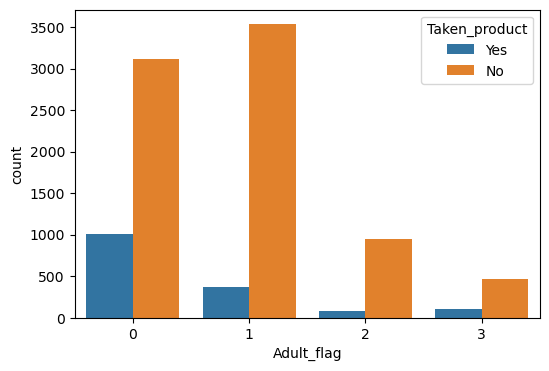

In [34]:
##plot for adult_flag and taken_product
plt.figure(figsize=(6,4))
sns.countplot(x=df.Adult_flag,hue=df.Taken_product);

We can't replace the values based on our judgement as there is no relevant data on what basis we can replace the values, so we'll simply drop the rows with values 2 and 3.

In [35]:
df = df.loc[~df['Adult_flag'].isin([2, 3])]
df.Adult_flag.value_counts()

Adult_flag
0    4119
1    3904
Name: count, dtype: int64

In [36]:
## let's check is we are left with any null values in our dataset .
df.isna().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8023 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 8023 non-null   object 
 1   Yearly_avg_view_on_travel_page                8023 non-null   float64
 2   preferred_device                              8023 non-null   object 
 3   total_likes_on_outstation_checkin_given       8023 non-null   float64
 4   yearly_avg_Outstation_checkins                8023 non-null   int32  
 5   member_in_family                              8023 non-null   int32  
 6   preferred_location_type                       8023 non-null   object 
 7   Yearly_avg_comment_on_travel_page             8023 non-null   int32  
 8   total_likes_on_outofstation_checkin_received  8023 non-null   int64  
 9   week_since_last_outstation_checkin            8023 non-null   int64

Great!!

**Now finally our dataframe is finally free from `na` and `duplicates` values. Also we have all features in their correct datatypes.**

### Outliers treatment

In [38]:
##creating numerical_cols for treating outliers
numerical_cols = [feature for feature in df.columns if df[feature].dtype!='O']
numerical_cols

['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'yearly_avg_Outstation_checkins',
 'member_in_family',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']

In [39]:
## we do not want 'Adult_flag' and 'travelling_network_rating' in our nnumerical_cols, so we'll drop them.
del(numerical_cols[8])
numerical_cols

['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'yearly_avg_Outstation_checkins',
 'member_in_family',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']

In [40]:
del(numerical_cols[8])
numerical_cols

['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'yearly_avg_Outstation_checkins',
 'member_in_family',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'Daily_Avg_mins_spend_on_traveling_page']

In [41]:
df[numerical_cols].head()

Yearly_avg_view_on_travel_page  total_likes_on_outstation_checkin_given  \
0                           307.0                                  38570.0   
1                           367.0                                   9765.0   
2                           277.0                                  48055.0   
3                           247.0                                  48720.0   
4                           202.0                                  20685.0   

   yearly_avg_Outstation_checkins  member_in_family  \
0                               1                 2   
1                               1                 1   
2                               1                 2   
3                               1                 4   
4                               1                 1   

   Yearly_avg_comment_on_travel_page  \
0                                 94   
1                                 61   
2                                 92   
3                                 56   
4                                 40   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
0                                   8                                  11   
1                                   1                                  23   
2                                   6                                  15   
3                                   1                                  11   
4                                   9                                  12   

   Daily_Avg_mins_spend_on_traveling_page  
0                                       8  
1                                      10  
2                                       7  
3                                       8  
4                                       6

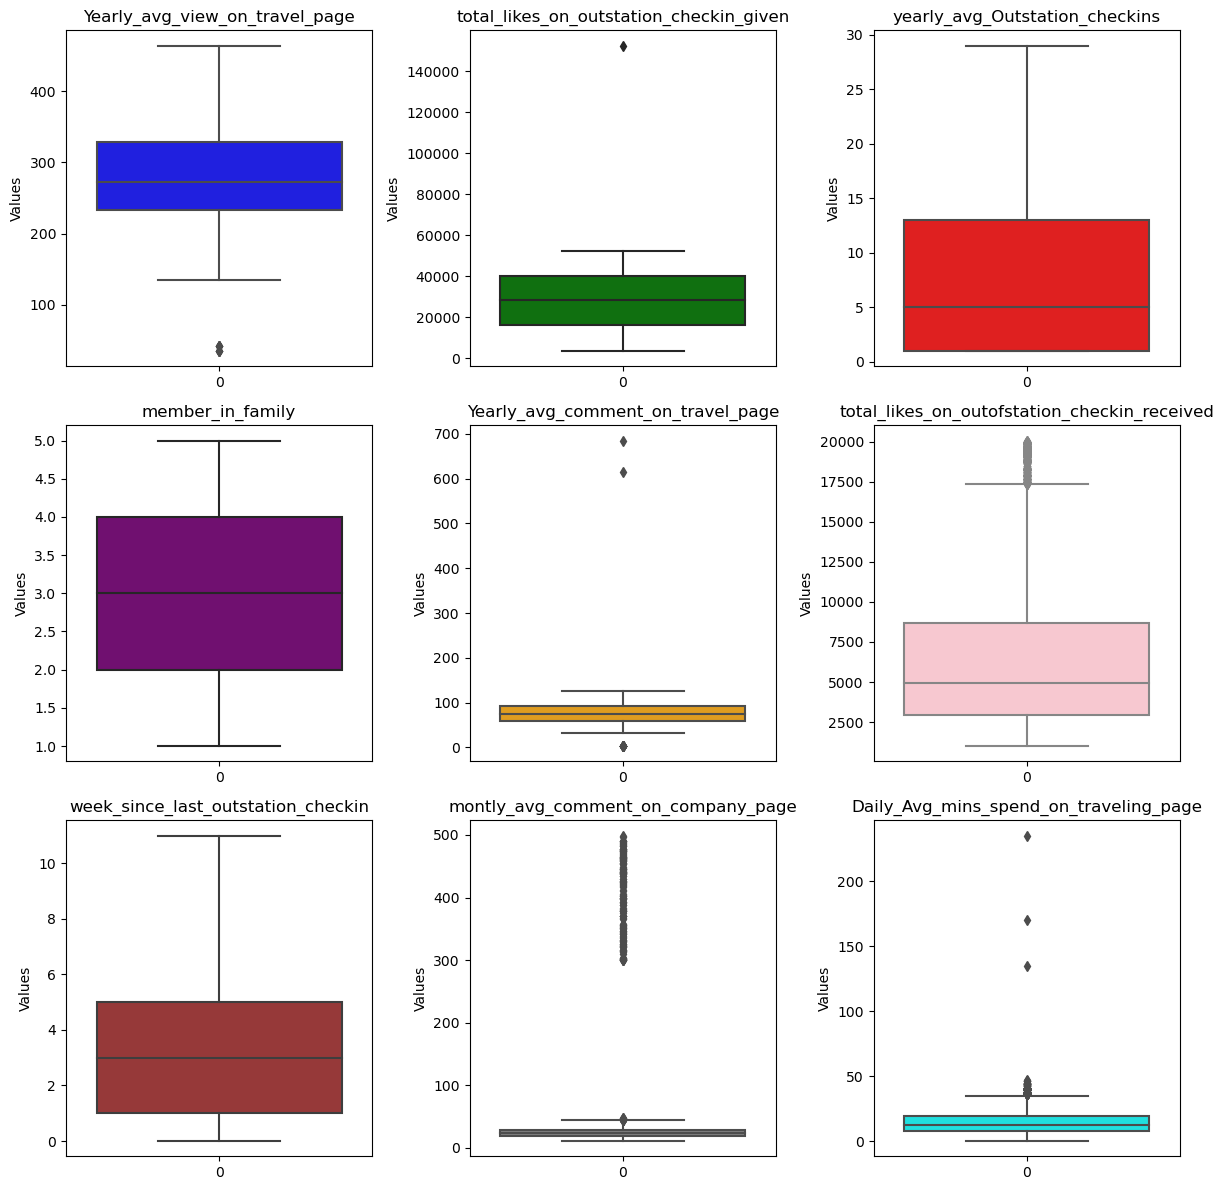

In [42]:
## now lets create boxplots for numerical_cols

# Create subplots with box plots for each numerical column
plt.figure(figsize=(12, 12))

colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df[col],color=colors[i-1])
    plt.title(col)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

We will remove the outliers for only three feature - `total_likes_on_outofstation_checkin_received`,`montly_avg_comment_on_company_page`,`Daily_Avg_mins_spend_on_traveling_page`

19.0
29.0
Minimum value is: 4.0
Maximum value is: 44.0


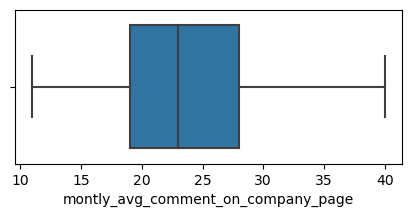

In [43]:
q1 = df['montly_avg_comment_on_company_page'].quantile(0.25)
q3 = df['montly_avg_comment_on_company_page'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
iqr
Minimum = q1 - 1.5*iqr
Maximum = q3 + 1.5*iqr
print('Minimum value is:',Minimum)
print('Maximum value is:',Maximum)

outlier_out_Minimum = (df ['montly_avg_comment_on_company_page']< Minimum)
outlier_out_Maximum = (df ['montly_avg_comment_on_company_page'] > 40)
df['montly_avg_comment_on_company_page'][(outlier_out_Minimum | outlier_out_Maximum)]
df2 = df['montly_avg_comment_on_company_page'][~(outlier_out_Minimum | outlier_out_Maximum)]
df = df[~(outlier_out_Minimum | outlier_out_Maximum)]
plt.figure(figsize=(5,2))
sns.boxplot(x=df['montly_avg_comment_on_company_page']);


q1 is  2921.0
q2 is  8680.0
Minimum value is: -5717.5
Maximum value is: 17318.5


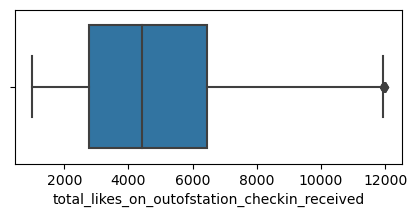

In [44]:
q1 = df['total_likes_on_outofstation_checkin_received'].quantile(0.25)
q3 = df['total_likes_on_outofstation_checkin_received'].quantile(0.75)
print('q1 is ',q1)
print('q2 is ',q3)

iqr = q3-q1
iqr
Minimum = q1 - 1.5*iqr
Maximum = q3 + 1.5*iqr
print('Minimum value is:',Minimum)
print('Maximum value is:',Maximum)

outlier_out_Minimum = (df ['total_likes_on_outofstation_checkin_received']< Minimum)
outlier_out_Maximum = (df ['total_likes_on_outofstation_checkin_received'] > 11988)
df['total_likes_on_outofstation_checkin_received'][(outlier_out_Minimum | outlier_out_Maximum)]
df2 = df['total_likes_on_outofstation_checkin_received'][~(outlier_out_Minimum | outlier_out_Maximum)]
df = df[~(outlier_out_Minimum | outlier_out_Maximum)]
plt.figure(figsize=(5,2))
sns.boxplot(x=df['total_likes_on_outofstation_checkin_received']);

q1 is  7.0
q2 is  16.0
Minimum value is: -6.5
Maximum value is: 29.5


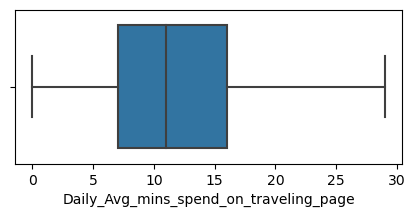

In [45]:
q1 = df['Daily_Avg_mins_spend_on_traveling_page'].quantile(0.25)
q3 = df['Daily_Avg_mins_spend_on_traveling_page'].quantile(0.75)
print('q1 is ',q1)
print('q2 is ',q3)

iqr = q3-q1
iqr
Minimum = q1 - 1.5*iqr
Maximum = q3 + 1.5*iqr
print('Minimum value is:',Minimum)
print('Maximum value is:',Maximum)

outlier_out_Minimum = (df ['Daily_Avg_mins_spend_on_traveling_page']< Minimum)
outlier_out_Maximum = (df ['Daily_Avg_mins_spend_on_traveling_page'] > 29)
df['Daily_Avg_mins_spend_on_traveling_page'][(outlier_out_Minimum | outlier_out_Maximum)]
df2 = df['Daily_Avg_mins_spend_on_traveling_page'][~(outlier_out_Minimum | outlier_out_Maximum)]
df = df[~(outlier_out_Minimum | outlier_out_Maximum)]
plt.figure(figsize=(5,2))
sns.boxplot(x=df['Daily_Avg_mins_spend_on_traveling_page']);

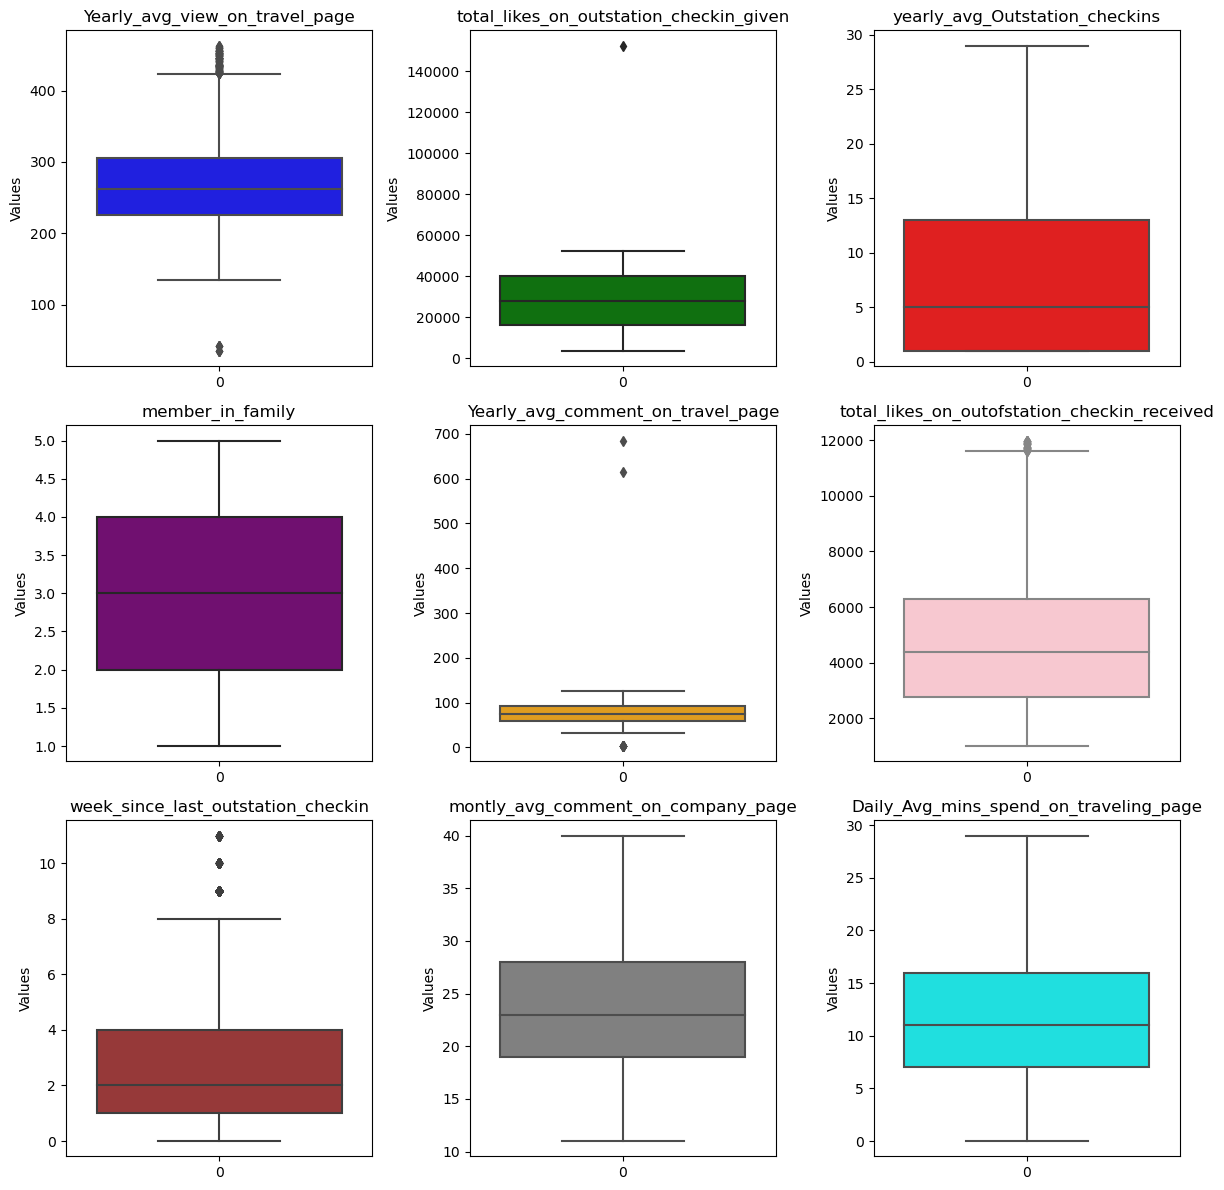

In [46]:
plt.figure(figsize=(12, 12))

colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df[col],color=colors[i-1])
    plt.title(col)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

q1 is  226.0
q2 is  305.0
Minimum value is: 107.5
Maximum value is: 423.5


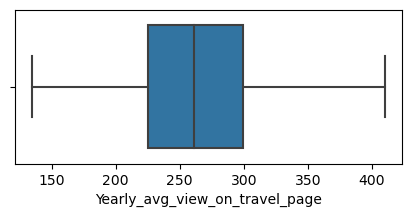

In [47]:
q1 = df['Yearly_avg_view_on_travel_page'].quantile(0.25)
q3 = df['Yearly_avg_view_on_travel_page'].quantile(0.75)
print('q1 is ',q1)
print('q2 is ',q3)

iqr = q3-q1
iqr
Minimum = q1 - 1.5*iqr
Maximum = q3 + 1.5*iqr
print('Minimum value is:',Minimum)
print('Maximum value is:',Maximum)

outlier_out_Minimum = (df ['Yearly_avg_view_on_travel_page']< Minimum)
outlier_out_Maximum = (df ['Yearly_avg_view_on_travel_page'] > 410)
df['Yearly_avg_view_on_travel_page'][(outlier_out_Minimum | outlier_out_Maximum)]
df2 = df['Yearly_avg_view_on_travel_page'][~(outlier_out_Minimum | outlier_out_Maximum)]
df = df[~(outlier_out_Minimum | outlier_out_Maximum)]
plt.figure(figsize=(5,2))
sns.boxplot(x=df['Yearly_avg_view_on_travel_page'])
plt.show();

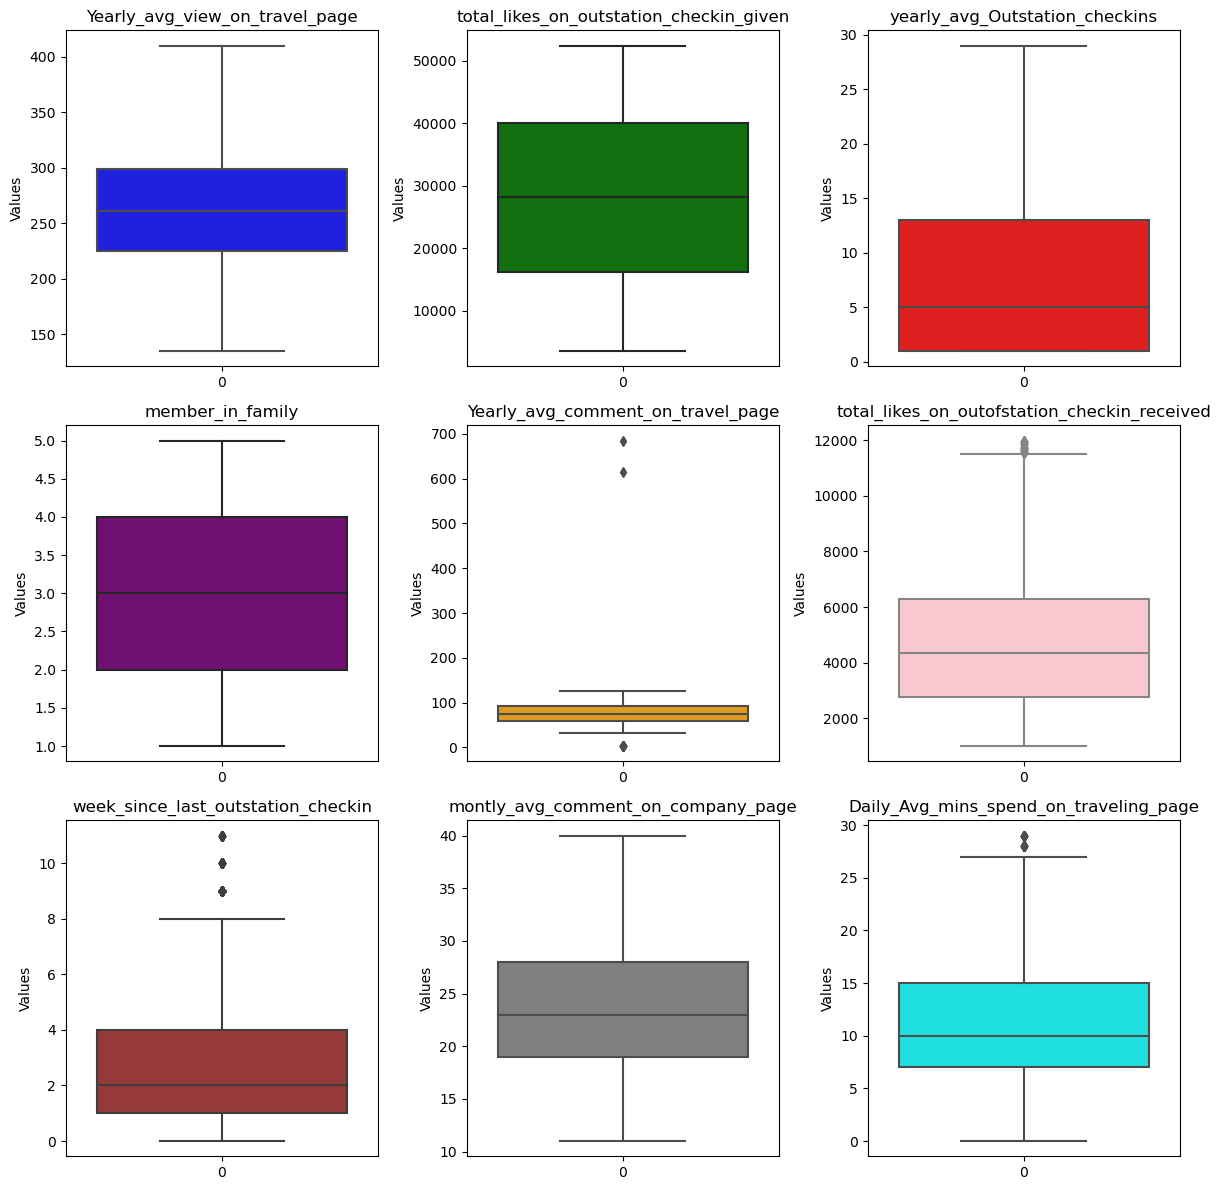

In [48]:
plt.figure(figsize=(12, 12))

colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df[col],color=colors[i-1])
    plt.title(col)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

#### Now we finally have treated the outliers also. But this might have some consequencies. Let's see what can be the consequency.

In [49]:
## checking for any null values
df.isna().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [50]:
##shape of the data
df.shape

(6373, 16)

This is the result of the outliers treatment effect. We have lost some of the datapoints, but it will likely not affect much.

In [51]:
## let's create categorical_cols
categorical_cols = [feature for feature in df.columns if feature not in numerical_cols]

In [52]:
df[categorical_cols].head()

Taken_product preferred_device preferred_location_type  \
0           Yes           Mobile               Financial   
1            No           Mobile               Financial   
2           Yes           Mobile                   Other   
3            No           Mobile               Financial   
4            No           Mobile                 Medical   

  following_company_page working_flag  travelling_network_rating  Adult_flag  
0                    Yes           No                          1           0  
1                     No          Yes                          4           1  
2                    Yes           No                          2           0  
3                    Yes           No                          3           0  
4                     No           No                          4           1

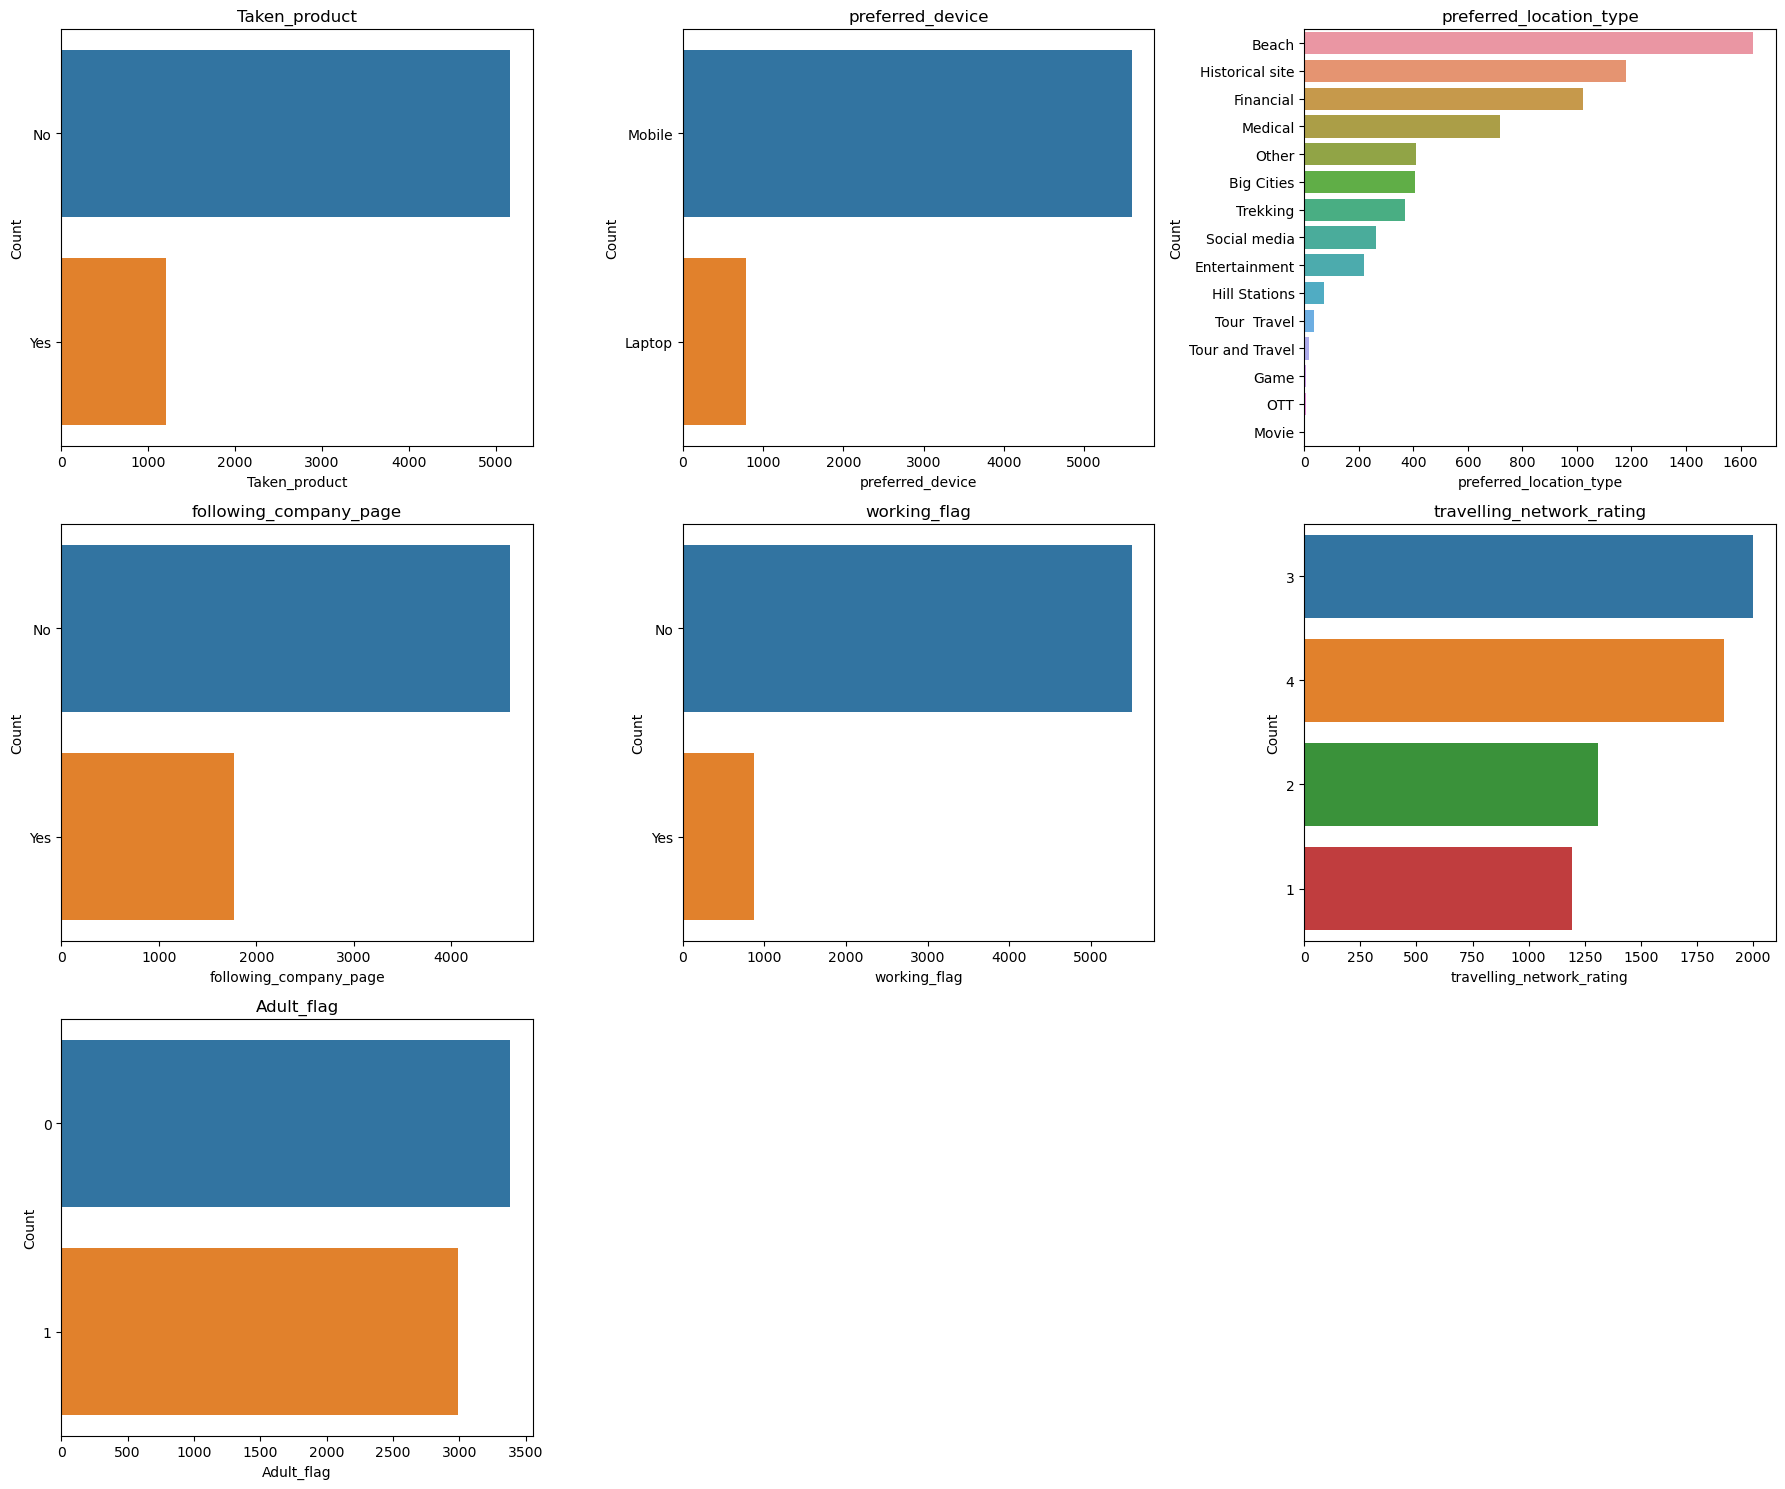

In [53]:
# Create subplots for count plots
num_cols = 3
num_rows = (len(categorical_cols) - 1) // num_cols + 1

plt.figure(figsize=(18, 5 * num_rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sorted_counts = df[col].value_counts().sort_values(ascending=False)
    sns.countplot(data=df, y=col, order=sorted_counts.index)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')

    
plt.subplots_adjust(wspace=1)   
plt.tight_layout()
plt.show()

#### Observations:

1. `Taken_product`:
   * Most of people haven't taken product.
   * People who has taken are only around 1100.
   * People who haven't taken are almost 5000.
   * This shows that most of the people just browse on internet and generally do not take the product, that means that there needs to be more focus on attracting customers.


                                                 
2. `prefferd_device`:
   * Mobile users are higher in number than that of laptop users.
   * Mobile user are more than 5000 in number while there are laptop users even less than 1000.
   
   
3. `preferred_location_type`:
   * Highest number of preferred location is **Beach** followed by **Historical Site** and least number of locations is for **OTT**,**Game** and **movie**.
   
   
4. `following_company_page`:
   * Most of the people who visits the page do not follow the page.
   
   
5. `working_flag`:
   * Most of the people are not working who visits the page.
   * This is also the reason that less number of people take the product.
   
   
6. `travelling_network_rating`:
   * Most people rated 3 points which is highest followed by 4 points.
   * This concludes that people are satisfied but we need to focus on people giving 1 and 2 points and needs to solve their issues also.
   
   
7. `Adult_flag`:
   * There is almost equal distribution for adult and infants in our data.

## Exploratory Data Analysis (EDA)📒

We have already saw **univariate analysis** in above charts for both numerical and categorical features. Now we'll do **bivariate analysis** followed by **multivariate analysis**.

In [54]:
## dropping 'Taken_product' and 'preferred_location_type'
del(categorical_cols[0])
del(categorical_cols[1])

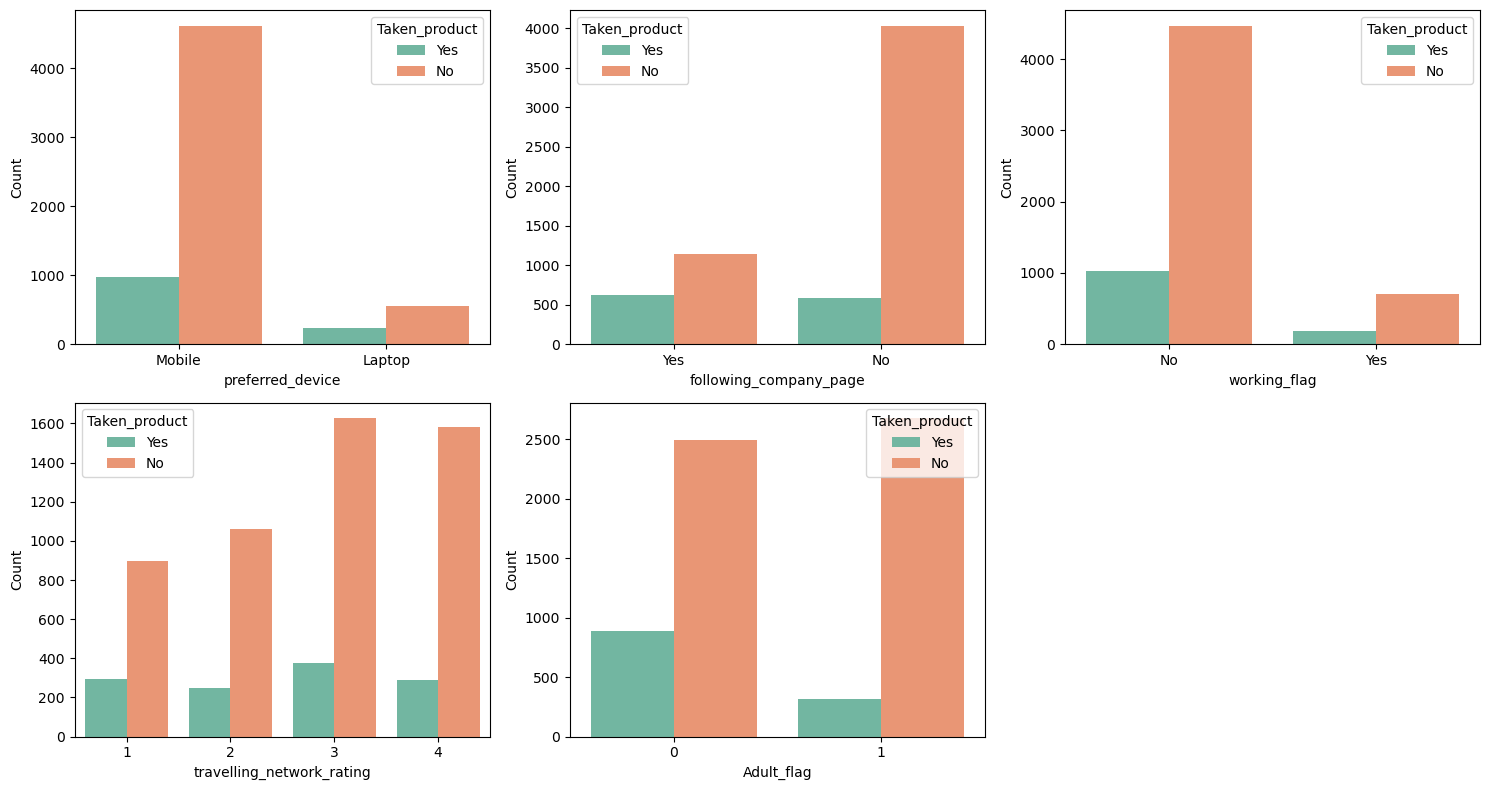

In [55]:
##let's see the number of users who has taken product based on the categorical_features.
num_cols = 3
num_rows = (len(categorical_cols) - 1) // num_cols + 1

plt.figure(figsize=(15,8))

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=col, hue='Taken_product', data=df, palette='Set2')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Taken_product')

plt.tight_layout()
plt.show()

In [56]:
## we'll create pie chart and barplot for 'preferred_location_type' seperately here for better visualisation.

labels = df['preferred_location_type'].value_counts().index
values = df['preferred_location_type'].value_counts().values

fig = {'data': [{'type': 'pie','name': 'Location type : Pie Chart',
                 'labels': df['preferred_location_type'].value_counts().index,
                 'values': df['preferred_location_type'].value_counts().values,
                 'direction': 'clockwise'}],
       'layout': {'title': 'Location type preferred by users'  # Add the title here
    }
}

# Plot the pie chart using Plotly
pyo.iplot(fig)

**Observations:**

1. The highest preferrd location is `Beach` by the users.
2. The least preferred location is `Movie` with only 3 preferences by users.

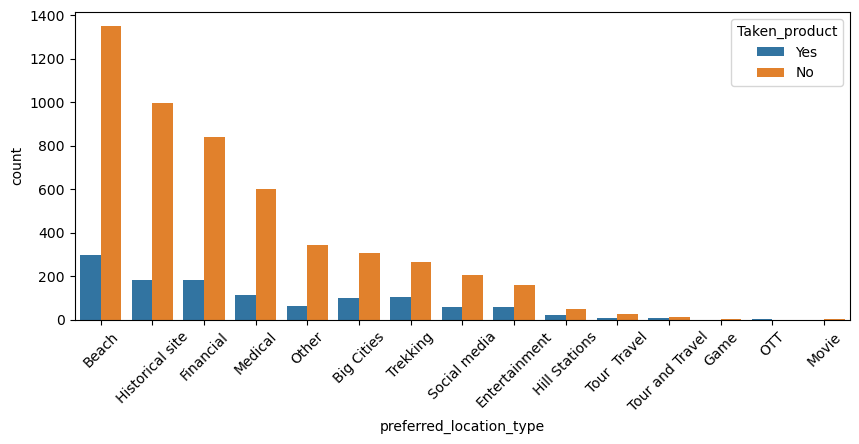

In [57]:
## now for countplot based on 'taken_product'
plt.figure(figsize=(10,4))
sns.countplot(x=df.preferred_location_type,hue=df.Taken_product,
              order=df.preferred_location_type.value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=45);

In each and every location there are less number of users who took the product is less comapred to who has taken the product.

In [58]:
df.head()

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0           Yes                           307.0           Mobile   
1            No                           367.0           Mobile   
2           Yes                           277.0           Mobile   
3            No                           247.0           Mobile   
4            No                           202.0           Mobile   

   total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                  38570.0                               1   
1                                   9765.0                               1   
2                                  48055.0                               1   
3                                  48720.0                               1   
4                                  20685.0                               1   

   member_in_family preferred_location_type  \
0                 2               Financial   
1                 1               Financial   
2                 2                   Other   
3                 4               Financial   
4                 1                 Medical   

   Yearly_avg_comment_on_travel_page  \
0                                 94   
1                                 61   
2                                 92   
3                                 56   
4                                 40   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   

   montly_avg_comment_on_company_page working_flag  travelling_network_rating  \
0                                  11           No                          1   
1                                  23          Yes                          4   
2                                  15           No                          2   
3                                  11           No                          3   
4                                  12           No                          4   

   Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
0           0                                       8  
1           1                                      10  
2           0                                       7  
3           0                                       8  
4           1                                       6

In [59]:
## also let's see number of family members of users based on preferred device, location type and also taken product
pd.crosstab(df.member_in_family,df.preferred_device)

preferred_device  Laptop  Mobile
member_in_family                
1                    110     632
2                    142    1113
3                    310    2223
4                    196    1483
5                     23     141

There are higher number of `Mobile` users than in `Laptop` in all ranges of family size.

In [60]:
##Finding the number of adults from each family size
pd.crosstab(df.member_in_family,df.Adult_flag)

Adult_flag           0     1
member_in_family            
1                  471   271
2                  603   652
3                 1315  1218
4                  904   775
5                   91    73

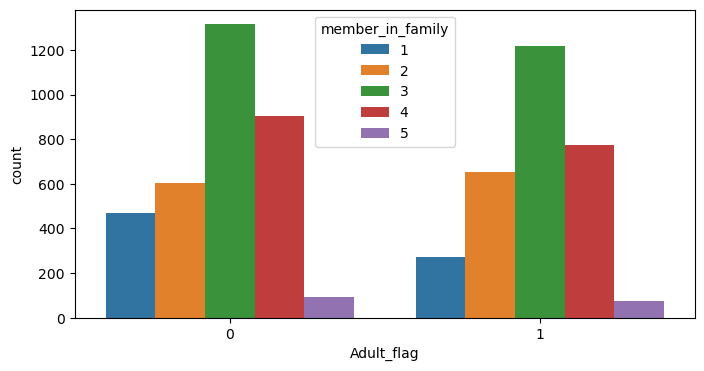

In [61]:
## let's see the above data in visuals for better understanding
plt.figure(figsize=(8,4))
sns.countplot(x=df.Adult_flag,hue=df.member_in_family);

**Observations:**
 1. Most number of family size here is clearly seen that is 3.
 2. And lowest is 5 which shows that it is evenly distributed.

In [62]:
##we'll do label encoding for seeing relationship b/w all the columns
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [63]:
df.head()

Taken_product  Yearly_avg_view_on_travel_page  preferred_device  \
0              1                           307.0                 1   
1              0                           367.0                 1   
2              1                           277.0                 1   
3              0                           247.0                 1   
4              0                           202.0                 1   

   total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                  38570.0                               1   
1                                   9765.0                               1   
2                                  48055.0                               1   
3                                  48720.0                               1   
4                                  20685.0                               1   

   member_in_family  preferred_location_type  \
0                 2                        3   
1                 1                        3   
2                 2                       10   
3                 4                        3   
4                 1                        7   

   Yearly_avg_comment_on_travel_page  \
0                                 94   
1                                 61   
2                                 92   
3                                 56   
4                                 40   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin  following_company_page  \
0                                   8                       1   
1                                   1                       0   
2                                   6                       1   
3                                   1                       1   
4                                   9                       0   

   montly_avg_comment_on_company_page  working_flag  \
0                                  11             0   
1                                  23             1   
2                                  15             0   
3                                  11             0   
4                                  12             0   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  
0                                       8  
1                                      10  
2                                       7  
3                                       8  
4                                       6

In [64]:
df.dtypes.value_counts()

int32      8
int64      6
float64    2
Name: count, dtype: int64

In [65]:
## let's convert 'Yearly_avg_view_on_travel_page' and 'total_likes_on_outstation_checkin_given' to int datatype
df['total_likes_on_outstation_checkin_given'] = df['total_likes_on_outstation_checkin_given'].astype(int)
df['Yearly_avg_view_on_travel_page'] = df['Yearly_avg_view_on_travel_page'].astype(int)
df.dtypes.value_counts()

int32    10
int64     6
Name: count, dtype: int64

### 📈'kde_plot'  for all numerical features:

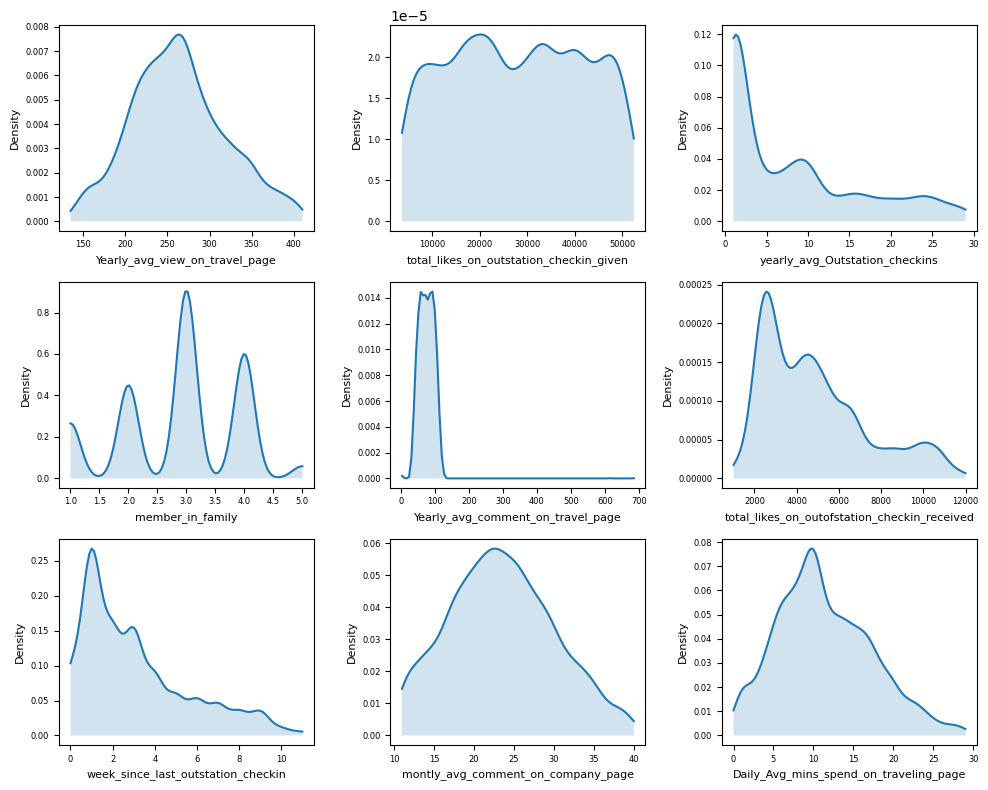

In [66]:
# Create a figure with subplots
# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = (len(numerical_cols) - 1) // num_cols + 1

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop through numerical columns and create KDE plots
for i, col in enumerate(numerical_cols):
    kde = gaussian_kde(df[col])
    x_vals = np.linspace(min(df[col]), max(df[col]), 100)
    kde_vals = kde(x_vals)
    
    axes[i].plot(x_vals, kde_vals)
    axes[i].fill_between(x_vals, kde_vals, alpha=0.2)
    axes[i].set_xlabel(col, fontsize=8)  # Set xlabel fontsize
    axes[i].set_ylabel('Density', fontsize=8)  # Set ylabel fontsize
    axes[i].tick_params(axis='both', labelsize=6)  # Set tick label fontsize

plt.tight_layout()
plt.show()

## Heatmap

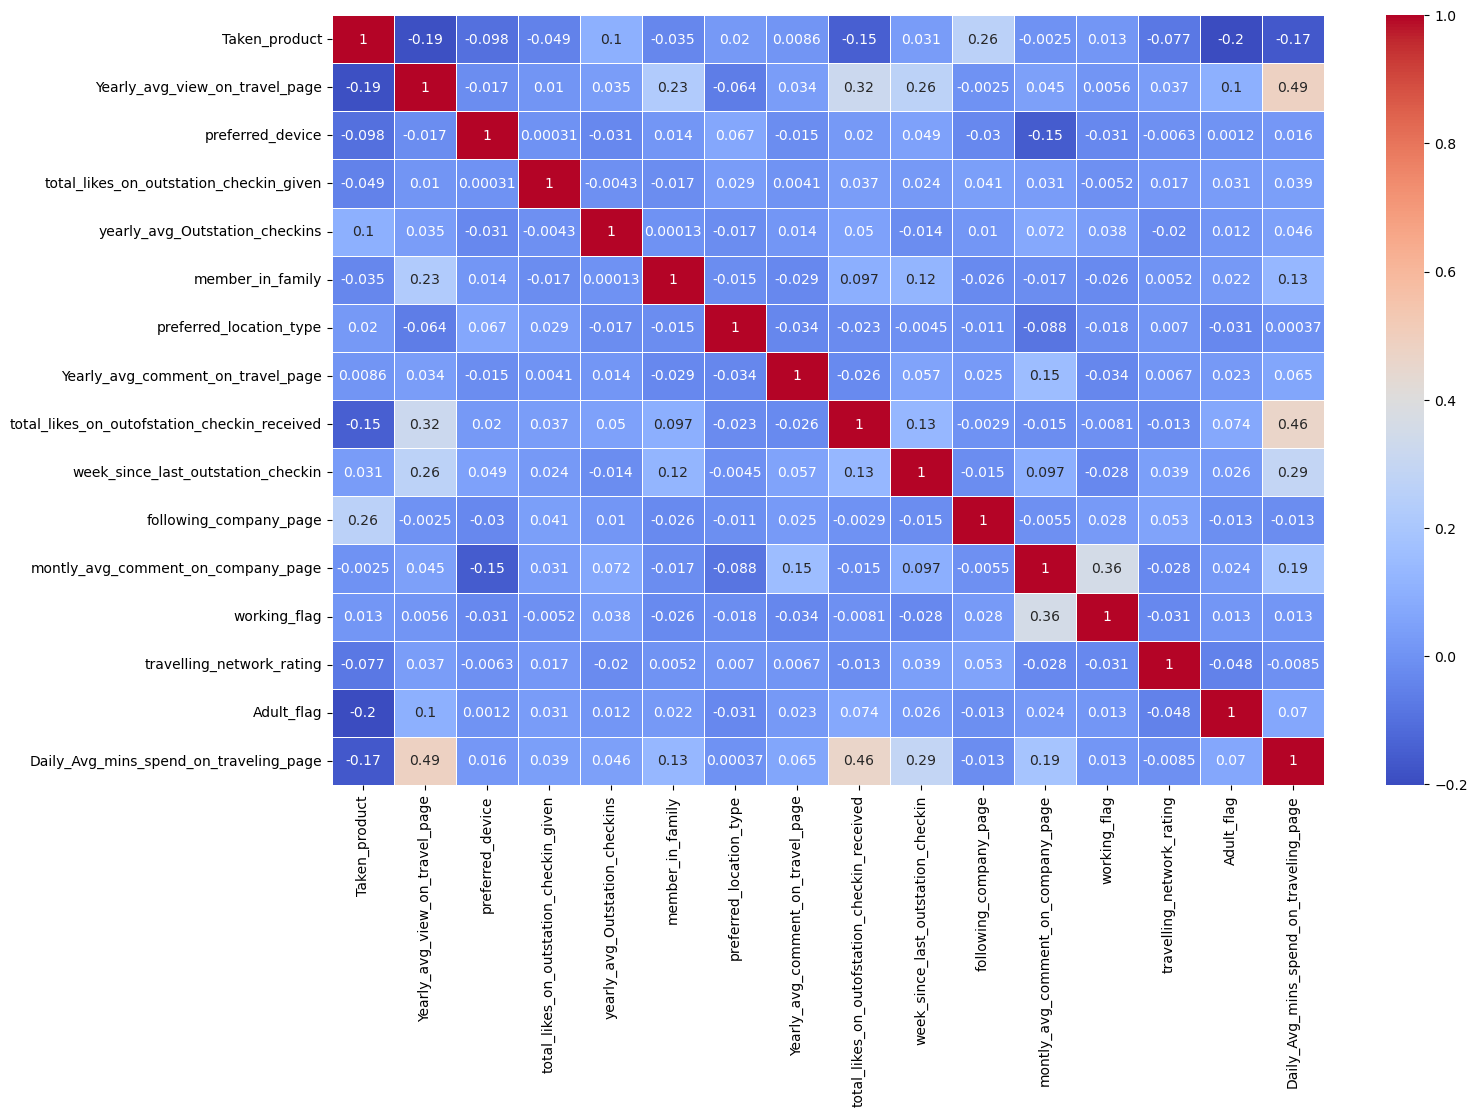

In [67]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,cmap='coolwarm');

## Train_Test_Split

In [68]:
X = df.drop(['Taken_product'],axis=1)
y = df['Taken_product']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=100)

In [70]:
##creating train csv file
train_data = pd.concat([X_train,y_train],axis=1)
train_data = pd.concat([X_train,y_train],axis=1)
train_data.to_csv('train.csv')

In [71]:
train_data.preferred_device.value_counts()

preferred_device
1    3897
0     564
Name: count, dtype: int64

In [72]:
##creating test csv file
test_data = pd.concat([X_test,y_test],axis=1)
test_data = pd.concat([X_test,y_test],axis=1)
test_data.to_csv('test.csv')

In [73]:
print('Length of train data is',train_data.shape[0])
print('Length of test data is',test_data.shape[0])

Length of train data is 4461
Length of test data is 1912


In [74]:
test_data.preferred_device.value_counts()

preferred_device
1    1695
0     217
Name: count, dtype: int64

## Model Building


Models that we are going to choose are:
1. **Random Forest**
2. **Logistic regression**
3. **SVM**
4. **Decision Tree**
5. **KNN Classifier**
6. **Gradient Boosting Classifier**
7. **xgbrf Clasifier**
8. **Cat Boost Classifier**

In [75]:
accuracy_list = []

### 1. Random forest 🌳🌲🌳

In [76]:
r_clf = RandomForestClassifier(max_features=0.5,max_depth=20, random_state=50)
r_clf.fit(X_train, y_train)
r_pred = r_clf.predict(X_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [77]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  98.64%


<Figure size 640x480 with 0 Axes>

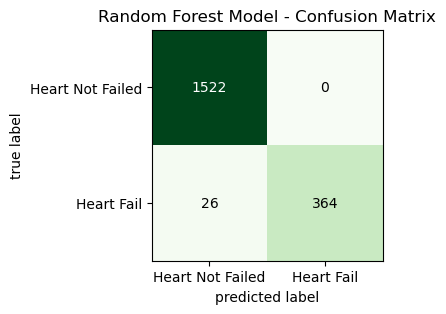

In [78]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.Greens)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
plt.show();

In [79]:
print(classification_report(y_test,r_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1522
           1       1.00      0.93      0.97       390

    accuracy                           0.99      1912
   macro avg       0.99      0.97      0.98      1912
weighted avg       0.99      0.99      0.99      1912



### 2. Logistic regression

In [80]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [81]:
print(Fore.BLUE + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  79.55%


<Figure size 640x480 with 0 Axes>

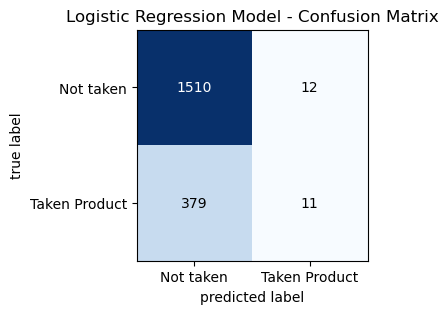

In [82]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Not taken","Taken Product"], fontsize=10)
plt.yticks(range(2), ["Not taken","Taken Product"], fontsize=10)
plt.show()

In [83]:
print(classification_report(y_test,log_reg_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1522
           1       0.48      0.03      0.05       390

    accuracy                           0.80      1912
   macro avg       0.64      0.51      0.47      1912
weighted avg       0.73      0.80      0.72      1912



### 3. Support Vector

In [84]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
sv_clf_pred = sv_clf.predict(X_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)

In [85]:
print(Fore.RED + "Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  79.60%


<Figure size 640x480 with 0 Axes>

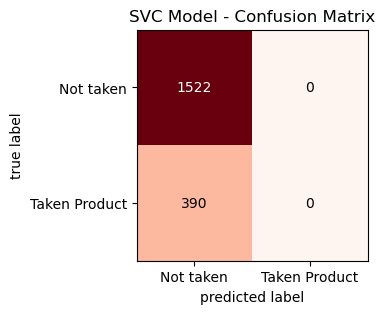

In [86]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.Reds)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Not taken","Taken Product"], fontsize=10)
plt.yticks(range(2), ["Not taken","Taken Product"], fontsize=10)
plt.show()

In [87]:
print(classification_report(y_test,sv_clf_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1522
           1       0.00      0.00      0.00       390

    accuracy                           0.80      1912
   macro avg       0.40      0.50      0.44      1912
weighted avg       0.63      0.80      0.71      1912



### 4. Decision Tree

In [88]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [89]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  81.69%


<Figure size 640x480 with 0 Axes>

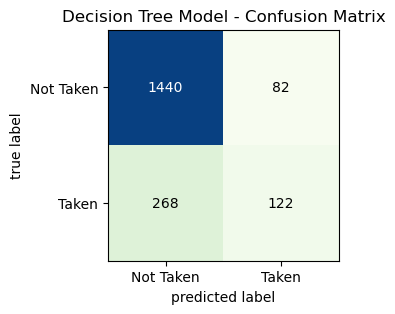

In [90]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.GnBu)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.yticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.show()

In [91]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1522
           1       0.60      0.31      0.41       390

    accuracy                           0.82      1912
   macro avg       0.72      0.63      0.65      1912
weighted avg       0.79      0.82      0.79      1912



### 5. KNN Classifier

In [92]:
kn_clf = KNeighborsClassifier(n_neighbors=5)
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [93]:
print(Fore.YELLOW + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))

Accuracy of K Neighbors Classifier is :  95.45%


* **In KNN classifier we got 95.45% accuracy with n_neighbors=10, we can improve accuracy score by reducing this n_neighbors value, but it might affect our model so we'll go with the default value.**

<Figure size 640x480 with 0 Axes>

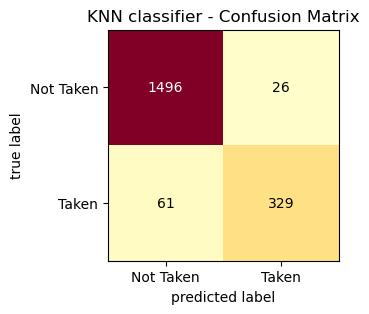

In [94]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.YlOrRd)
plt.title("KNN classifier - Confusion Matrix")
plt.xticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.yticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.show();

In [95]:
print(classification_report(y_test,kn_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1522
           1       0.93      0.84      0.88       390

    accuracy                           0.95      1912
   macro avg       0.94      0.91      0.93      1912
weighted avg       0.95      0.95      0.95      1912



### 6. Gradient Boosting

In [96]:
gb_clf = GradientBoostingClassifier(max_depth=10, random_state=50)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
accuracy_list.append(100*gb_acc)

In [97]:
print(Fore.LIGHTCYAN_EX + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gb_acc))

Accuracy of Gradient Boosting is :  98.95%


<Figure size 640x480 with 0 Axes>

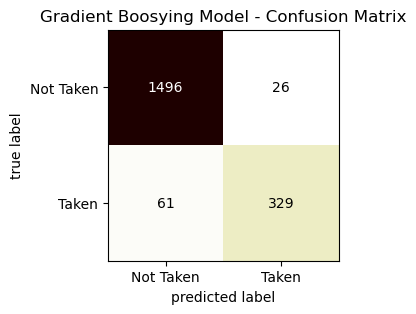

In [98]:
## confusion_matrix
m = confusion_matrix(y_test, gb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.pink_r)
plt.title("Gradient Boosying Model - Confusion Matrix")
plt.xticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.yticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.show()

In [99]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1522
           1       1.00      0.95      0.97       390

    accuracy                           0.99      1912
   macro avg       0.99      0.98      0.98      1912
weighted avg       0.99      0.99      0.99      1912



### 7. xgbrf Clasifier

In [100]:
xgb_clf = xgb.XGBRFClassifier(max_depth=20, random_state=50)
xgb_clf.fit(X_train,y_train)
xgb_pred = xgb_clf.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
accuracy_list.append(100*xgb_acc)

In [101]:
print(Fore.LIGHTMAGENTA_EX + "Accuracy of XGBRFClassifier is : ", "{:.2f}%".format(100* xgb_acc))

Accuracy of XGBRFClassifier is :  97.54%


<Figure size 640x480 with 0 Axes>

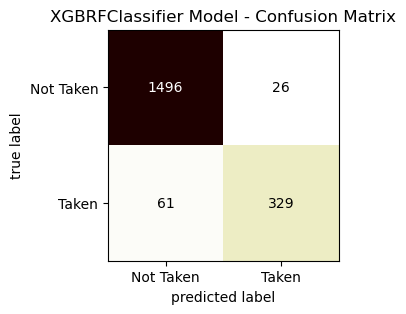

In [102]:
m = confusion_matrix(y_test, xgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.pink_r)
plt.title("XGBRFClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.yticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.show()

In [103]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1522
           1       0.99      0.89      0.94       390

    accuracy                           0.98      1912
   macro avg       0.98      0.94      0.96      1912
weighted avg       0.98      0.98      0.97      1912



### 8. CatBoost Classifier

In [104]:
cat_clf = CatBoostClassifier()
cat_clf.fit(X_train,y_train)
cat_pred = cat_clf.predict(X_test)
cat_acc = accuracy_score(y_test, cat_pred)
accuracy_list.append(100*cat_acc)

Learning rate set to 0.019509
0:	learn: 0.6797203	total: 158ms	remaining: 2m 38s
1:	learn: 0.6675795	total: 168ms	remaining: 1m 23s
2:	learn: 0.6525381	total: 176ms	remaining: 58.5s
3:	learn: 0.6396751	total: 185ms	remaining: 46.1s
4:	learn: 0.6290212	total: 193ms	remaining: 38.5s
5:	learn: 0.6170469	total: 204ms	remaining: 33.8s
6:	learn: 0.6056212	total: 214ms	remaining: 30.4s
7:	learn: 0.5956195	total: 224ms	remaining: 27.8s
8:	learn: 0.5864351	total: 235ms	remaining: 25.9s
9:	learn: 0.5773200	total: 244ms	remaining: 24.1s
10:	learn: 0.5678396	total: 252ms	remaining: 22.6s
11:	learn: 0.5585027	total: 260ms	remaining: 21.4s
12:	learn: 0.5488495	total: 267ms	remaining: 20.3s
13:	learn: 0.5401717	total: 274ms	remaining: 19.3s
14:	learn: 0.5319427	total: 281ms	remaining: 18.4s
15:	learn: 0.5263485	total: 286ms	remaining: 17.6s
16:	learn: 0.5200701	total: 291ms	remaining: 16.8s
17:	learn: 0.5129871	total: 295ms	remaining: 16.1s
18:	learn: 0.5083826	total: 298ms	remaining: 15.4s
19:	learn

191:	learn: 0.2472236	total: 949ms	remaining: 4s
192:	learn: 0.2463949	total: 953ms	remaining: 3.98s
193:	learn: 0.2457660	total: 957ms	remaining: 3.98s
194:	learn: 0.2453871	total: 961ms	remaining: 3.97s
195:	learn: 0.2447680	total: 965ms	remaining: 3.96s
196:	learn: 0.2441986	total: 968ms	remaining: 3.95s
197:	learn: 0.2437566	total: 972ms	remaining: 3.94s
198:	learn: 0.2434530	total: 976ms	remaining: 3.93s
199:	learn: 0.2431695	total: 980ms	remaining: 3.92s
200:	learn: 0.2428180	total: 984ms	remaining: 3.91s
201:	learn: 0.2422503	total: 988ms	remaining: 3.9s
202:	learn: 0.2418289	total: 992ms	remaining: 3.89s
203:	learn: 0.2414215	total: 995ms	remaining: 3.88s
204:	learn: 0.2408736	total: 999ms	remaining: 3.88s
205:	learn: 0.2404850	total: 1s	remaining: 3.87s
206:	learn: 0.2399987	total: 1.01s	remaining: 3.86s
207:	learn: 0.2396435	total: 1.01s	remaining: 3.85s
208:	learn: 0.2392237	total: 1.01s	remaining: 3.84s
209:	learn: 0.2388552	total: 1.02s	remaining: 3.83s
210:	learn: 0.23815

354:	learn: 0.1792023	total: 1.56s	remaining: 2.84s
355:	learn: 0.1788107	total: 1.56s	remaining: 2.83s
356:	learn: 0.1785673	total: 1.57s	remaining: 2.82s
357:	learn: 0.1782616	total: 1.57s	remaining: 2.82s
358:	learn: 0.1779704	total: 1.58s	remaining: 2.81s
359:	learn: 0.1776408	total: 1.58s	remaining: 2.81s
360:	learn: 0.1774381	total: 1.58s	remaining: 2.8s
361:	learn: 0.1770372	total: 1.59s	remaining: 2.8s
362:	learn: 0.1767935	total: 1.59s	remaining: 2.79s
363:	learn: 0.1766235	total: 1.59s	remaining: 2.79s
364:	learn: 0.1763227	total: 1.6s	remaining: 2.78s
365:	learn: 0.1761017	total: 1.6s	remaining: 2.78s
366:	learn: 0.1758567	total: 1.61s	remaining: 2.77s
367:	learn: 0.1756194	total: 1.61s	remaining: 2.77s
368:	learn: 0.1753713	total: 1.61s	remaining: 2.76s
369:	learn: 0.1750000	total: 1.62s	remaining: 2.75s
370:	learn: 0.1746988	total: 1.62s	remaining: 2.75s
371:	learn: 0.1743820	total: 1.63s	remaining: 2.74s
372:	learn: 0.1741782	total: 1.63s	remaining: 2.74s
373:	learn: 0.17

536:	learn: 0.1320879	total: 2.26s	remaining: 1.95s
537:	learn: 0.1317096	total: 2.27s	remaining: 1.95s
538:	learn: 0.1315828	total: 2.27s	remaining: 1.94s
539:	learn: 0.1314233	total: 2.27s	remaining: 1.94s
540:	learn: 0.1312454	total: 2.28s	remaining: 1.93s
541:	learn: 0.1310793	total: 2.28s	remaining: 1.93s
542:	learn: 0.1309512	total: 2.28s	remaining: 1.92s
543:	learn: 0.1306488	total: 2.29s	remaining: 1.92s
544:	learn: 0.1304657	total: 2.29s	remaining: 1.91s
545:	learn: 0.1303225	total: 2.29s	remaining: 1.91s
546:	learn: 0.1300646	total: 2.3s	remaining: 1.9s
547:	learn: 0.1298348	total: 2.3s	remaining: 1.9s
548:	learn: 0.1296321	total: 2.31s	remaining: 1.89s
549:	learn: 0.1295395	total: 2.31s	remaining: 1.89s
550:	learn: 0.1293076	total: 2.31s	remaining: 1.88s
551:	learn: 0.1290188	total: 2.32s	remaining: 1.88s
552:	learn: 0.1288346	total: 2.32s	remaining: 1.88s
553:	learn: 0.1286148	total: 2.32s	remaining: 1.87s
554:	learn: 0.1284681	total: 2.33s	remaining: 1.87s
555:	learn: 0.12

696:	learn: 0.1028764	total: 2.87s	remaining: 1.25s
697:	learn: 0.1026817	total: 2.88s	remaining: 1.24s
698:	learn: 0.1024734	total: 2.88s	remaining: 1.24s
699:	learn: 0.1023319	total: 2.88s	remaining: 1.24s
700:	learn: 0.1021232	total: 2.89s	remaining: 1.23s
701:	learn: 0.1019917	total: 2.89s	remaining: 1.23s
702:	learn: 0.1018266	total: 2.9s	remaining: 1.22s
703:	learn: 0.1015832	total: 2.9s	remaining: 1.22s
704:	learn: 0.1014090	total: 2.9s	remaining: 1.21s
705:	learn: 0.1012807	total: 2.91s	remaining: 1.21s
706:	learn: 0.1011046	total: 2.91s	remaining: 1.21s
707:	learn: 0.1009947	total: 2.91s	remaining: 1.2s
708:	learn: 0.1008669	total: 2.92s	remaining: 1.2s
709:	learn: 0.1007584	total: 2.92s	remaining: 1.19s
710:	learn: 0.1006207	total: 2.93s	remaining: 1.19s
711:	learn: 0.1005397	total: 2.93s	remaining: 1.19s
712:	learn: 0.1004476	total: 2.93s	remaining: 1.18s
713:	learn: 0.1002883	total: 2.94s	remaining: 1.18s
714:	learn: 0.1001228	total: 2.94s	remaining: 1.17s
715:	learn: 0.099

875:	learn: 0.0766419	total: 3.56s	remaining: 504ms
876:	learn: 0.0765282	total: 3.56s	remaining: 500ms
877:	learn: 0.0763855	total: 3.57s	remaining: 496ms
878:	learn: 0.0763197	total: 3.57s	remaining: 492ms
879:	learn: 0.0761259	total: 3.58s	remaining: 488ms
880:	learn: 0.0760333	total: 3.58s	remaining: 484ms
881:	learn: 0.0759346	total: 3.58s	remaining: 480ms
882:	learn: 0.0758457	total: 3.59s	remaining: 476ms
883:	learn: 0.0756926	total: 3.59s	remaining: 472ms
884:	learn: 0.0756109	total: 3.6s	remaining: 467ms
885:	learn: 0.0754881	total: 3.6s	remaining: 463ms
886:	learn: 0.0753735	total: 3.6s	remaining: 459ms
887:	learn: 0.0752994	total: 3.61s	remaining: 455ms
888:	learn: 0.0752159	total: 3.61s	remaining: 451ms
889:	learn: 0.0751140	total: 3.62s	remaining: 447ms
890:	learn: 0.0750505	total: 3.62s	remaining: 443ms
891:	learn: 0.0749290	total: 3.63s	remaining: 439ms
892:	learn: 0.0747437	total: 3.63s	remaining: 435ms
893:	learn: 0.0746090	total: 3.63s	remaining: 431ms
894:	learn: 0.0

In [105]:
print(Fore.GREEN + "Accuracy of CatBoostClassifier is : ","{:.2f}%".format(100* cat_acc))

Accuracy of CatBoostClassifier is :  97.12%


<Figure size 640x480 with 0 Axes>

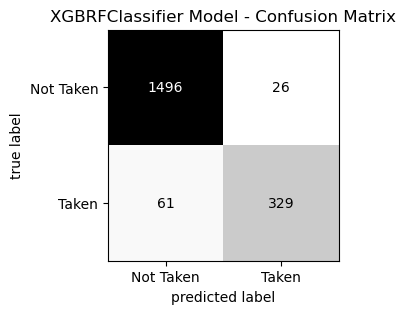

In [106]:
m = confusion_matrix(y_test, cat_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.gray_r)
plt.title("XGBRFClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.yticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.show()

In [107]:
print(classification_report(y_test,cat_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1522
           1       1.00      0.86      0.92       390

    accuracy                           0.97      1912
   macro avg       0.98      0.93      0.95      1912
weighted avg       0.97      0.97      0.97      1912



In [108]:
model_list = ['Random Forest','Logistic regression','SVM','Decision Tree','KNN Classifier','Gradient Boosting',
              'xgbrf Clasifier','Cat Boost Classifier']

In [109]:
accuracy_list

[98.64016736401673,
 79.55020920502092,
 79.60251046025104,
 81.69456066945607,
 95.44979079497908,
 98.9539748953975,
 97.5418410041841,
 97.1234309623431]

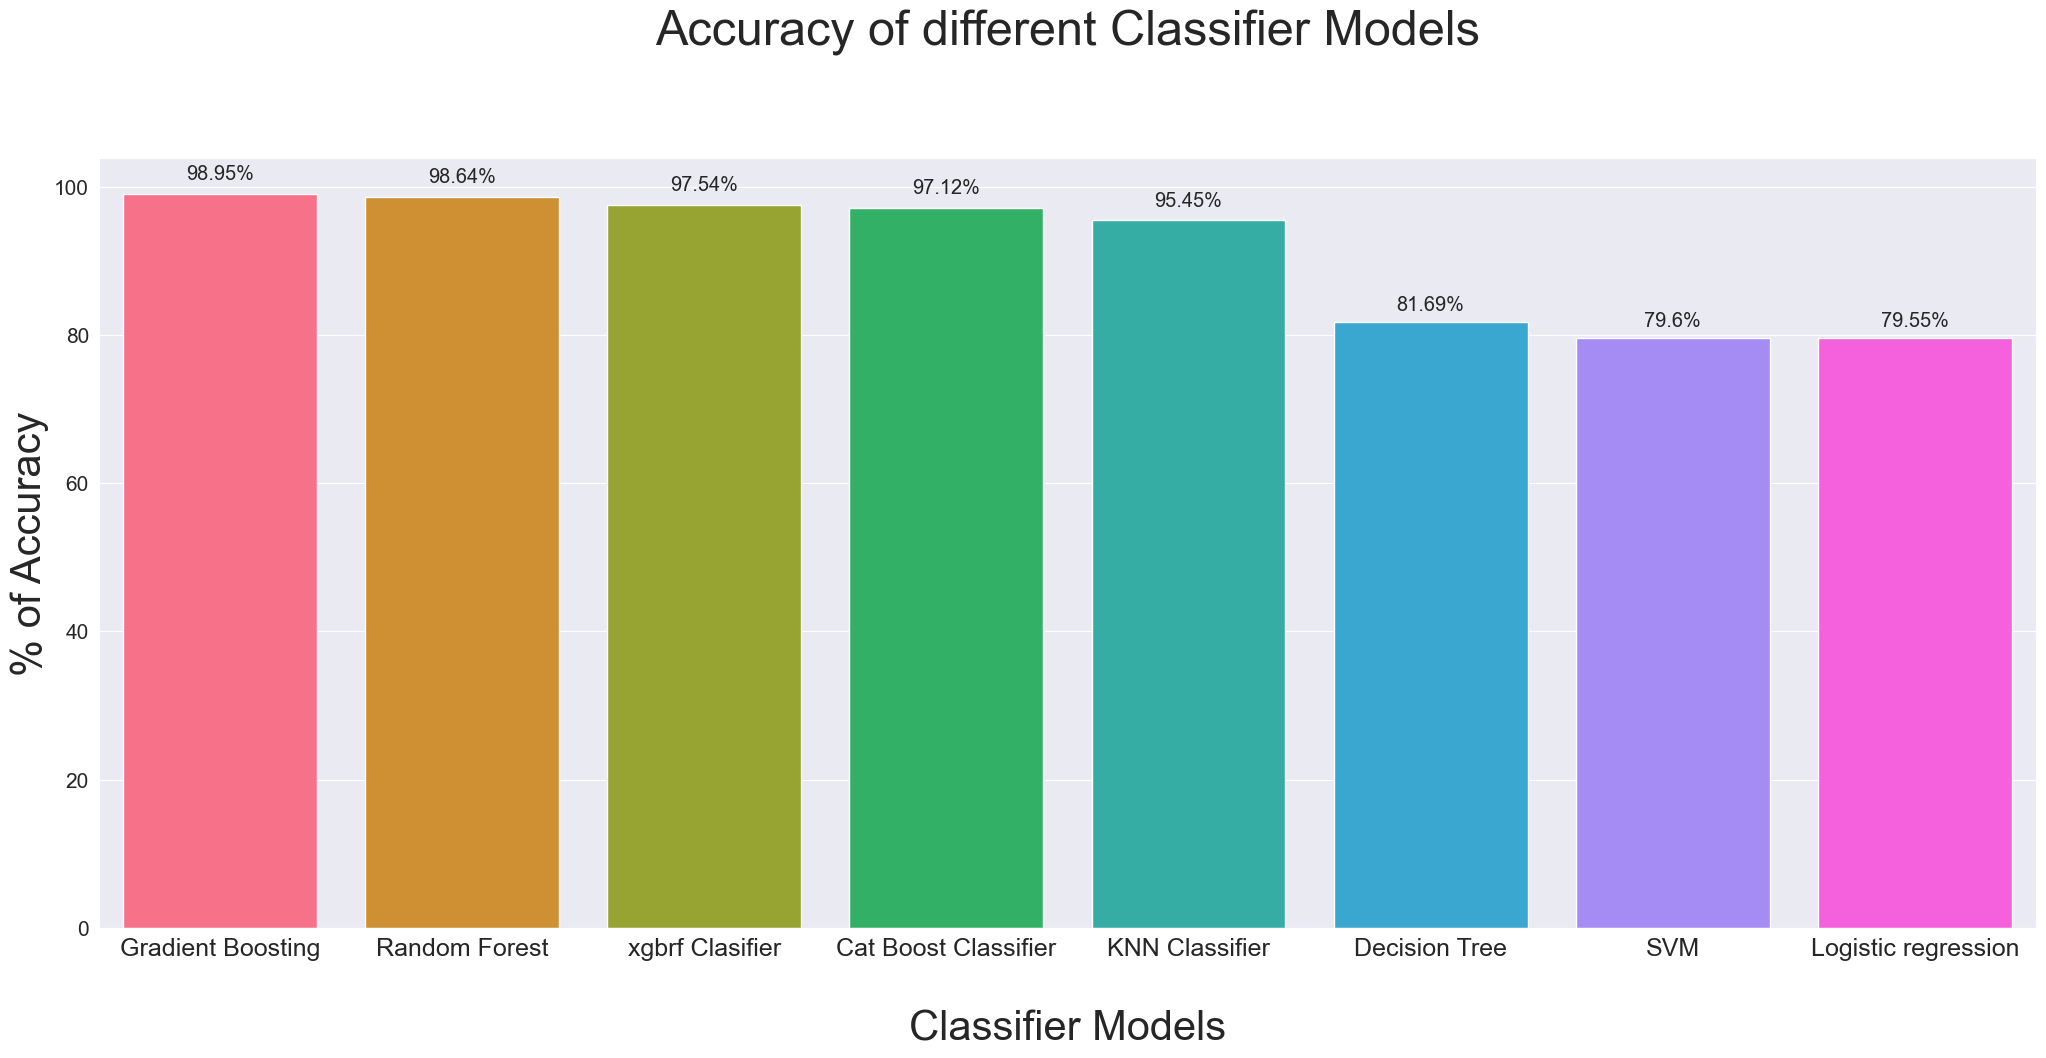

In [110]:
plt.rcParams['figure.figsize']=25,10
sns.set_style('darkgrid')

# Sort the data in descending order
sorted_indices = sorted(range(len(accuracy_list)), key=lambda k: accuracy_list[k], reverse=True)
sorted_model_list = [model_list[i] for i in sorted_indices]
sorted_accuracy_list = [accuracy_list[i] for i in sorted_indices]

ax = sns.barplot(x=sorted_model_list, y=sorted_accuracy_list, palette = "husl", saturation=2.0)
plt.xlabel('\nClassifier Models', fontsize = 30 )
plt.ylabel('% of Accuracy', fontsize = 30)
plt.title('Accuracy of different Classifier Models\n\n', fontsize = 35)
plt.xticks(fontsize = 18, horizontalalignment = 'center', rotation =0)
plt.yticks(fontsize = 15)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

## Model Accuracy

* Gradient Boosting - 98.95%
* Random Forest - 98.64%
* xgbrf Clasifier - 97.54%
* Cat Boost Classifier - 97.12%
* KNN Classifier - 95.44%
* Decision Tree - 81.70%
* SVM - 79.60%
* Logistic regression - 79.55%